# <h1 align="center"> © RsydMathTech. <h1/>

# <span style="color:skyblue; font-size:18px;">ANOVA Test Results</span>

1. Konsep dasar ANOVA

ANOVA (Analysis of Variance) dipakai buat bandingin rata-rata (mean) dari lebih dari 2 grup.

Outputnya ada 2 nilai penting:

F-value → seberapa besar perbedaan antar rata-rata grup dibanding variasi di dalam grup.

p-value → probabilitas bahwa perbedaan itu cuma kebetulan.

2. Cara baca p-value

p < 0.05 → signifikan, artinya ada perbedaan nyata antar grup.

p ≥ 0.05 → tidak signifikan, artinya perbedaan rata-rata antar grup bisa jadi hanya kebetulan.

In [13]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Example dataset (Car make vs Price)
data = {
    "make": [
        "Honda", "Honda", "Honda", "Honda",
        "Subaru", "Subaru", "Subaru", "Subaru",
        "Jaguar", "Jaguar", "Jaguar", "Jaguar"
    ],
    "price": [
        18000, 19000, 20000, 21000,   # Honda
        18500, 19500, 20500, 21500,   # Subaru
        55000, 57000, 59000, 61000    # Jaguar
    ]
}

df = pd.DataFrame(data)

# Extract price data for each make
honda = df[df["make"] == "Honda"]["price"]
subaru = df[df["make"] == "Subaru"]["price"]
jaguar = df[df["make"] == "Jaguar"]["price"]

# Function to run ANOVA and interpret result
def run_anova(group1, group2, name1, name2):
    f_stat, p_val = stats.f_oneway(group1, group2)
    print(f"ANOVA {name1} vs {name2}: F={f_stat:.2f}, p={p_val:.4f}")
    if p_val < 0.05:
        print(f"There's Significant difference between {name1} and {name2}\n")
    else:
        print(f"There's no significant difference between {name1} and {name2}\n")

# Run tests
run_anova(honda, subaru, "Honda", "Subaru")
run_anova(honda, jaguar, "Honda", "Jaguar")
run_anova(subaru, jaguar, "Subaru", "Jaguar")

ANOVA Honda vs Subaru: F=0.30, p=0.6036
There's no significant difference between Honda and Subaru

ANOVA Honda vs Jaguar: F=711.48, p=0.0000
There's Significant difference between Honda and Jaguar

ANOVA Subaru vs Jaguar: F=693.12, p=0.0000
There's Significant difference between Subaru and Jaguar



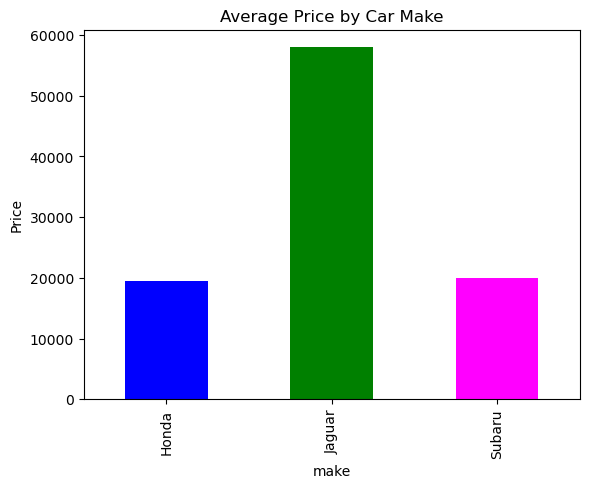

In [14]:
df.groupby("make")["price"].mean().plot(kind="bar", color=["blue","green","magenta"])
plt.title("Average Price by Car Make")
plt.ylabel("Price")
plt.show()

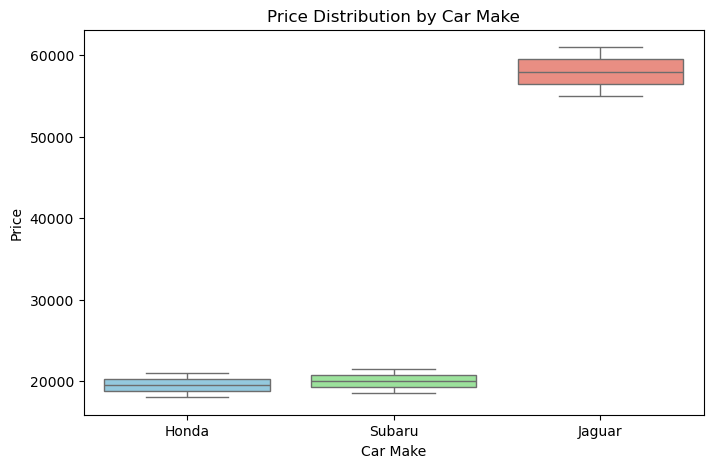

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(x="make", y="price", hue="make", data=df, palette=["skyblue", "lightgreen", "salmon"])
plt.title("Price Distribution by Car Make")
plt.ylabel("Price")
plt.xlabel("Car Make")
plt.show()